In [31]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [32]:
num_frames = 100
timestep = 0.05
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]
# r_vals[0] = 1e-10
M_vals = np.linspace(0, 25.0, len(r_vals))
M_vals[0] = 1e-10
print(f"shape of r_vals : {r_vals.shape}")
print(f"shape of M_vals : {M_vals.shape}")

shape of r_vals : (500,)
shape of M_vals : (500,)


In [33]:
alpha = 0.5
Difcon = 2
t_vals = np.linspace(0, 5, 101)
t_vals = t_vals[1:]
print(t_vals)

P_m_vals = 2 * 1 * Difcon * np.power(t_vals, alpha)

print(P_m_vals.shape)

print(P_m_vals)

P_m_vals /= 0.05

print(P_m_vals.shape)

print(P_m_vals)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4
 1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05 2.1
 2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75 2.8
 2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3  3.35 3.4  3.45 3.5
 3.55 3.6  3.65 3.7  3.75 3.8  3.85 3.9  3.95 4.   4.05 4.1  4.15 4.2
 4.25 4.3  4.35 4.4  4.45 4.5  4.55 4.6  4.65 4.7  4.75 4.8  4.85 4.9
 4.95 5.  ]
(100,)
[0.89442719 1.26491106 1.54919334 1.78885438 2.         2.19089023
 2.36643191 2.52982213 2.68328157 2.82842712 2.96647939 3.09838668
 3.2249031  3.34664011 3.46410162 3.57770876 3.68781778 3.79473319
 3.89871774 4.         4.09878031 4.19523539 4.28952212 4.38178046
 4.47213595 4.5607017  4.64758002 4.73286383 4.81663783 4.89897949
 4.97995984 5.05964426 5.13809303 5.21536192 5.29150262 5.36656315
 5.4405882  5.5136195  5.58569602 5.65685425 5.72712843 5.7965507
 5.86515132 5.93295879 

In [34]:
P = np.zeros((t_vals.shape[0], M_vals.shape[0]))
print(P.shape)

(100, 500)


In [35]:
for i in range(len(t_vals)):
    # make P[P_m_vals[i]] = 1 or the closest value to 1
    if(int(P_m_vals[i]) < len(M_vals) - 1):
        P[i][int(P_m_vals[i])] = 1
    # # have a gaussian distribution around P_m_vals[i] in P[i]
    # P[i] = np.exp(-np.power(M_vals - P_m_vals[i], 2) / (2 * np.power(0.5, 2)))
    # # normalize P[i]
    # P[i] /= np.sum(P[i])
    # # normalize P[i]
    
P = P / np.trapz(P, M_vals, axis=1)[:, None]

# check how many rows have nan values
print(np.isnan(P).any(axis=1).sum())

print(P.shape)   
    

0
(100, 500)


In [36]:
print(P)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


 $G^k_s(r) = \int P^k(M)\frac{e^{\frac{-r^2}{M}}}{\pi M}dM$

In [37]:
# get G using  $G^k_s(r) = \int P^k(M)e^{\frac{-r^2}{M}}dM$

G_pred = np.zeros((num_frames, r_vals.shape[0]))
print(G_pred.shape)

# calculate the integral using trapz
e_pow_r2_into_m = np.exp(np.outer(-r_vals*r_vals, 1/M_vals)) * (1/(M_vals*np.pi))
for i in range(num_frames):
    G_pred[i] = np.trapz(P[i] * e_pow_r2_into_m, M_vals)

# normalize G_pred
area = np.zeros(num_frames)
for i in range(num_frames):
    # area[i] = np.trapz(G_pred[i, :] * 2 * np.pi * r_vals, r_vals)
    area[i] = np.trapz(G_pred[i, :], r_vals)
    G_pred[i, :] /= area[i]
    

(100, 500)


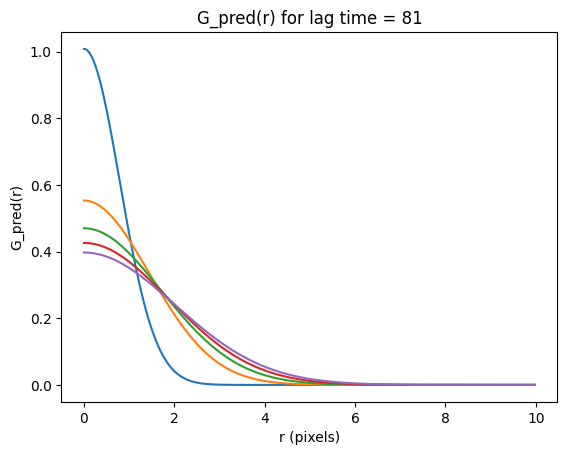

In [38]:
# plot G_pred
for i in range(1, num_frames, 20):
    # plt.plot(r_vals, G_pred[i, :] * 2 * np.pi * r_vals)
    plt.plot(r_vals, G_pred[i, :])
    plt.xlabel("r (pixels)")
    plt.ylabel("G_pred(r)")
    plt.title(f"G_pred(r) for lag time = {i}")
    # plt.show()
plt.show()

In [39]:
# save G_pred
np.savetxt("G_pred_test.txt", G_pred)

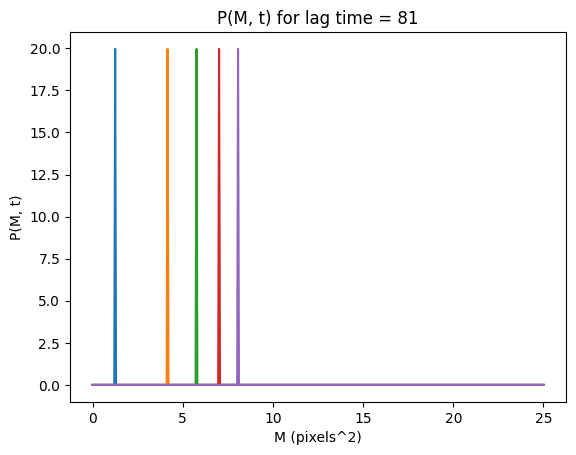

In [40]:
# plot P
for i in range(1, num_frames, 20):
    plt.plot(M_vals, P[i, :])
    plt.xlabel("M (pixels^2)")
    plt.ylabel("P(M, t)")
    plt.title(f"P(M, t) for lag time = {i}")
    # plt.show()
plt.show()